In [1]:
import sqlite3
con = sqlite3.connect('db.sqlite3')
cur = con.cursor()
cur.execute('SELECT * FROM stock_stock_price WHERE id <51')
alist = cur.fetchall()

In [2]:
import numpy as np
data1 = np.array(alist)

In [3]:
data1[:,4]

array(['68.0', '70.5', '75.0', '76.0', '80.0', '80.0', '82.5', '82.0',
       '87.0', '87.0', '88.0', '85.5', '85.5', '86.0', '83.0', '80.5',
       '84.0', '84.5', '85.0', '84.5', '84.0', '81.0', '79.5', '82.0',
       '80.0', '81.0', '82.0', '81.0', '80.0', '79.0', '84.0', '85.5',
       '83.5', '87.5', '87.5', '88.5', '87.5', '85.0', '86.0', '84.5',
       '85.5', '86.5', '88.0', '88.0', '90.0', '89.5', '91.5', '97.5',
       '100.0', '105.0'], dtype='<U32')

In [4]:
x = data1[:,4].astype('float64')

In [5]:
cur.execute('SELECT * FROM stock_stock_price WHERE id <52 AND id > 1 ')
alist = cur.fetchall()
data2 = np.array(alist)

In [6]:
data2[:,4]

array(['70.5', '75.0', '76.0', '80.0', '80.0', '82.5', '82.0', '87.0',
       '87.0', '88.0', '85.5', '85.5', '86.0', '83.0', '80.5', '84.0',
       '84.5', '85.0', '84.5', '84.0', '81.0', '79.5', '82.0', '80.0',
       '81.0', '82.0', '81.0', '80.0', '79.0', '84.0', '85.5', '83.5',
       '87.5', '87.5', '88.5', '87.5', '85.0', '86.0', '84.5', '85.5',
       '86.5', '88.0', '88.0', '90.0', '89.5', '91.5', '97.5', '100.0',
       '105.0', '109.0'], dtype='<U32')

In [7]:
y = data2[:,4].astype('float64')

Text(0, 0.5, 'y')

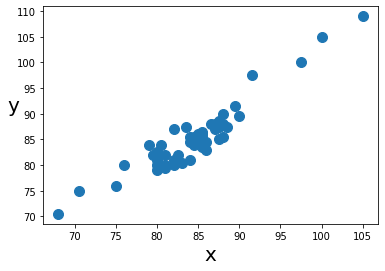

In [8]:
import matplotlib.pyplot as plt
plt.scatter(x,y,s=100)
plt.xlabel('x',fontsize=20)
plt.ylabel('y',fontsize=20,rotation=0)

In [9]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x[:,np.newaxis],y)
print('intercept:',model.intercept_)
print('coefficient:',model.coef_)

intercept: 0.013317422434340642
coefficient: [1.00954654]


Text(0, 0.5, 'y')

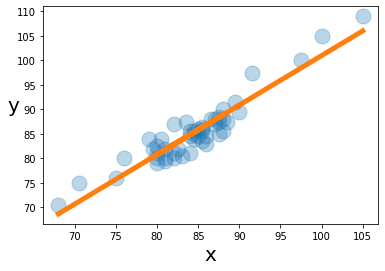

In [10]:
plt.plot(x,y,'o',markersize=15,alpha=0.3)
plt.plot(x,model.intercept_+model.coef_*x,linewidth=5)
plt.xlabel('x',fontsize=20)
plt.ylabel('y',fontsize=20,rotation=0)

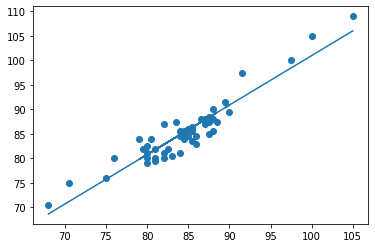

In [11]:
xx = x[:,np.newaxis]
model = LinearRegression()
model.fit(xx,y)
yfit = model.predict(xx)
plt.scatter(x,y)
plt.plot(x,yfit)

In [12]:
#先default要將degree設為多少
#make_pipeline是指可以將多個scikit learn的function一起執行
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))


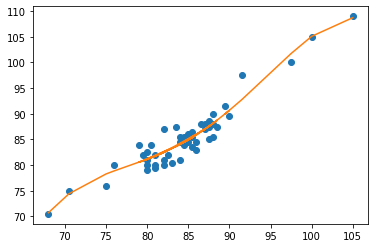

In [15]:
ypred=PolynomialRegression(degree=4).fit(xx,y).predict(xx)
plt.plot(x,y,'o')
plt.plot(x,ypred)

In [26]:
cur.execute('SELECT * FROM stock_stock_price WHERE id <=200 AND id >150')
alist = cur.fetchall()
test_data = np.array(alist)
test_data = test_data[:,4].astype('float64')
test_data

array([110.5, 113. , 111. , 106. , 105.5, 103.5, 103. , 102. , 107.5,
       106.5, 113.5, 115.5, 116.5, 124.5, 132. , 131. , 127. , 130. ,
       131.5, 129. , 130. , 128. , 134. , 132. , 130. , 131.5, 135. ,
       139. , 138.5, 135.5, 136. , 140. , 135.5, 138.5, 138.5, 140.5,
       141. , 139.5, 137. , 138. , 137.5, 139. , 139. , 134.5, 130. ,
       132.5, 133.5, 133.5, 131. , 131. ])

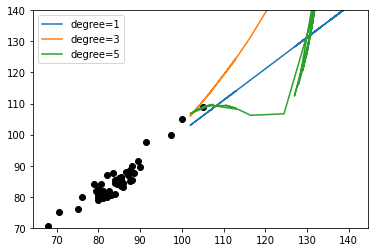

In [37]:
plt.scatter(x.ravel(),y,color='black')
y_test=PolynomialRegression(degree).fit(xx,y).predict(test_data[:,np.newaxis])

for degree in [1,3,5]:
    y_test=PolynomialRegression(degree).fit(xx,y).predict(test_data[:,np.newaxis])
    plt.plot(test_data.ravel(),y_test,label='degree={}'.format(degree))
plt.ylim(70,140)
plt.legend(loc='best')

In [41]:
save_model = PolynomialRegression(degree=4).fit(xx,y)

In [45]:
import joblib
joblib.dump(save_model, 'model.pkl')

['model.pkl']